In [1]:
# for installing al the libraries if needed-----------
# pip install pandas
# pip install matplotlib
# pip install seaborn
# pip install scikit-learn

In [2]:

#importing libraries and models
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score)

#loading the data in variable df
df=pd.read_csv("lungcancer.csv")

#checking NA values
df.isna().sum()

#encoding yes/no to 1/0 for avoiding conflicts/errors
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'YES': 1, 'NO': 0})

#to check data in each columns
df.head()

#seperating target variable
X = df.drop('LUNG_CANCER', axis=1)
y = df['LUNG_CANCER']

#train-test split 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#training the logistic model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

#Predicting the value and prob is done for Roc-Auc since it need probability value(0-1)
y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

# evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-score:", f1_score(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))
                                

Accuracy: 0.9755
Precision: 0.9384615384615385
Recall: 0.7484662576687117
F1-score: 0.8327645051194539
ROC-AUC: 0.9892028547478384


In [3]:
#training Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

#predicting the value plus probability
y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

# evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-score:", f1_score(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_dt))



Accuracy: 0.9755
Precision: 0.9384615384615385
Recall: 0.7484662576687117
F1-score: 0.8327645051194539
ROC-AUC: 0.8880476637355518


In [4]:
#training Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#predict value and probability
y_pred_rf = rf_model.predict(X_test)
y_prob_rf=rf_model.predict_proba(X_test)[:,1]

# evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))


Accuracy: 0.9735
Precision: 0.9044117647058824
Recall: 0.754601226993865
F1-score: 0.822742474916388
ROC-AUC: 0.9771049089773605


In [5]:
#comparing three models

#creating a dataframe to store all evaulations and map them
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf)
    ],
    'Precision': [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_dt),
        precision_score(y_test, y_pred_rf)
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_dt),
        recall_score(y_test, y_pred_rf)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_rf)
    ],
    'ROC-AUC': [
        roc_auc_score(y_test, y_prob_lr),
        roc_auc_score(y_test, y_prob_dt),
        roc_auc_score(y_test, y_prob_rf)
    ]
})
print(results)

                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression    0.9755   0.938462  0.748466  0.832765  0.989203
1        Decision Tree    0.9640   0.769231  0.797546  0.783133  0.888048
2        Random Forest    0.9735   0.904412  0.754601  0.822742  0.977105


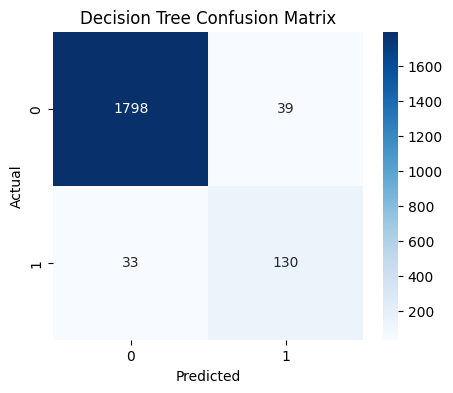

In [6]:


#for decision tree
cm = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()


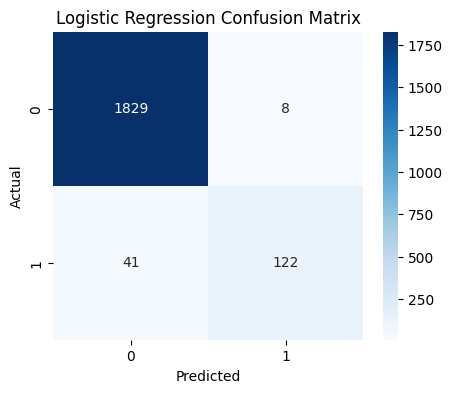

In [7]:
#for logistic regression
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


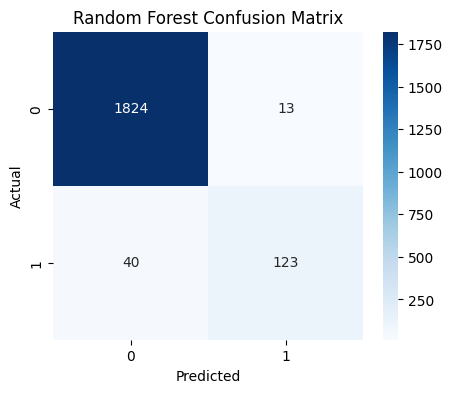

In [8]:
#for Random Forest
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()


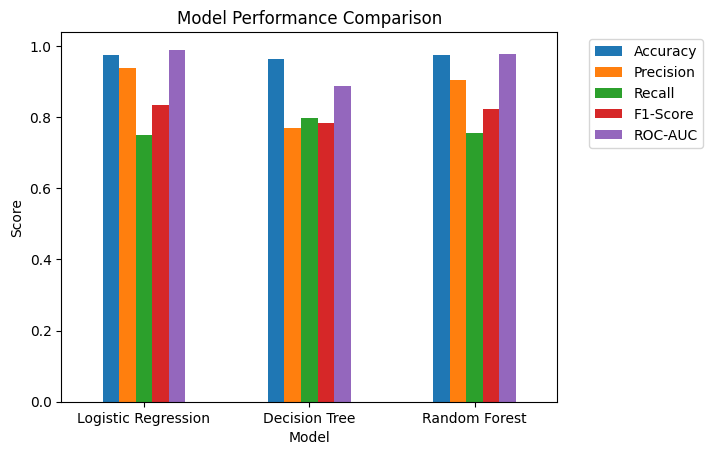

In [9]:
# Set Model as index
results_plot = results.set_index('Model')

# plotting bar
results_plot.plot(kind='bar')

# Labels and title
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Model')

# Rotate x labels
plt.xticks(rotation=0)

# Show legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [13]:
test_data_lr=[[20,1,1,1,0,0,0,1,0,0,0,1,1,1]]# list with age, and other features
prediction_lr=lr_model.predict(test_data_lr)
print(prediction_lr)

[1]


C:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
